<h1 style='font-size:40px'> Integrals</h1>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Extraímos integrais de uma função quando desejamos saber a área sob a sua curva dentro de um intervalo. A intuição seria traçarmos vários retângulos na região e somarmos as suas áreas.
        </li>
    </ul>
</div>

In [17]:
x

array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,
        -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,
        -7.3,  -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,
        -6.4,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,
        -5.5,  -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,
        -4.6,  -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,
        -3.7,  -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,
        -2.8,  -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,
        -1.9,  -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,
        -1. ,  -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,
        -0.1,   0. ])

<BarContainer object of 11 artists>

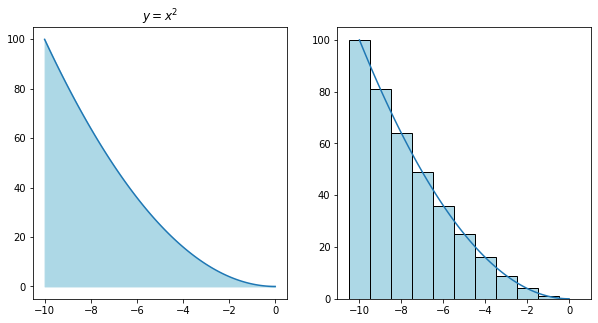

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 0, 101)
y = x**2

# Área x^2.
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x,y)
plt.title('$y=x^{2}$')
plt.fill_between(x,y, color='lightblue')

# Ŕetângulos sob a curva.
x_bar = np.linspace(-10, 0, 11)
y_bar = x_bar**2
plt.subplot(122)
plt.plot(x,y)
plt.bar(x_bar,y_bar, width=1, color='lightblue', edgecolor='k')

In [41]:
# Medindo a área aproximada sob a curva em [-10, 0].
np.dot(np.diff(x_bar), y_bar[:-1])

385.0

<p style='color:red'> Example I</p>